# Customer Personality Analysis
고객 특성 분석
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

<br>

### ~7/17
1. 이상치, 결측치 어떻게 할지 (제거할지, 다른값으로 대체할지 ..) 생각해보기
2. 추가변수, 파생변수 만들어보기

<br>

In [62]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<br>

<br>

In [30]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<br>

#### 이상치 확인 및 제거
이상치 기준 : 1.5*IQR 규칙 이용하기

제3사분위수와 제1사분위수로부터 1.5*IQR만큼 오른쪽 또는 왼쪽에 있는 값을 이상치라고 하겠음

In [31]:
import numpy as np

# 이상치 탐지 함수
def outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

<br>

1. Year_Birth 출생연도

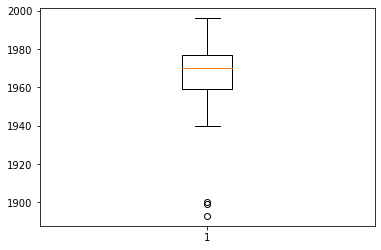

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.boxplot(df.Year_Birth)
plt.show()

*이상치 존재 제거 필요*

In [33]:
# 확인
outliers(df.Year_Birth)

(array([192, 239, 339], dtype=int64),)

2. Income

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


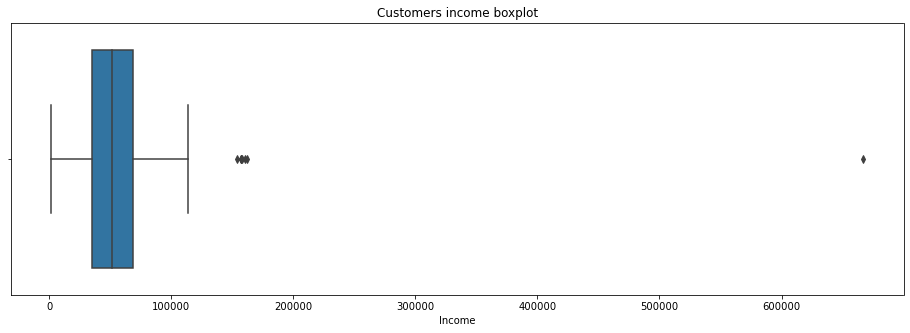

In [34]:
import seaborn as sns

plt.figure(figsize=(16,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(df['Income'])
plt.show()

*이상치 존재 제거 필요*

In [35]:
df.index[df.Income>140000]

Int64Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

3. Kidhome, Teenhome
*이진변수 아님, 자녀 수임*

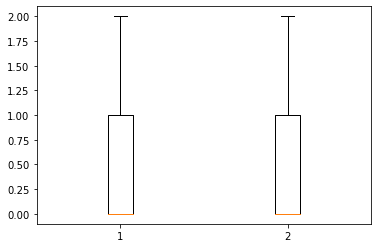

In [36]:
fig, ax = plt.subplots()
ax.boxplot([df.Kidhome, df.Teenhome])
plt.show()

*이상치 존재 X*

4. Recency 고객의 마지막 구매 이후 일 수

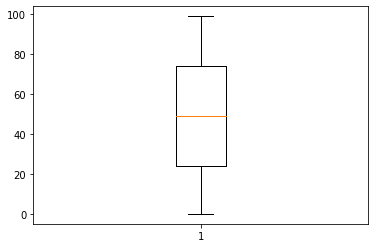

In [37]:
fig, ax = plt.subplots()
ax.boxplot([df.Recency])
plt.show()

*이상치 존재 X*

5. Products들

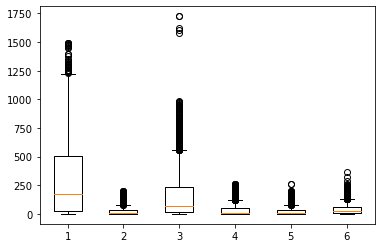

In [80]:
fig, ax = plt.subplots()
ax.boxplot([df.MntWines, df.MntFruits, df.MntMeatProducts, df.MntFishProducts,
           df.MntSweetProducts, df.MntGoldProds])
plt.show()

In [55]:
# 확인
# print(outliers(df.MntWines),
#      outliers(df.MntFruits),
#      outliers(df.MntMeatProducts),
#      outliers(df.MntFishProducts),
#      outliers(df.MntSweetProducts),
#      outliers(df.MntGoldProds))

In [47]:
print(len(outliers(df.MntWines)[0]),
     len(outliers(df.MntFruits)[0]),
     len(outliers(df.MntMeatProducts)[0]),
     len(outliers(df.MntFishProducts)[0]),
     len(outliers(df.MntSweetProducts)[0]),
     len(outliers(df.MntGoldProds)[0]))

35 227 175 223 248 207


In [83]:
# 1. income 결측치와 8개 지우기
# 2. 나이는 세개 지우기

new = df[df.Income<140000]
new.is_nul

164     1973
617     1976
655     1975
687     1982
1300    1971
1653    1977
2132    1949
2233    1977
Name: Year_Birth, dtype: int64

6. NumDealsPurchases 할인된 구매 횟수(할인이 있을 시 구매한 횟수)

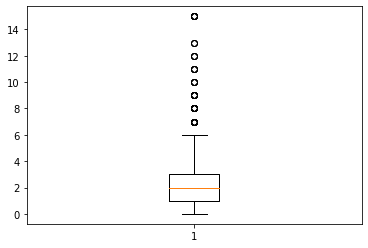

In [13]:
fig, ax = plt.subplots()
ax.boxplot([df.NumDealsPurchases])
plt.show()

In [14]:
# 확인
outliers(df.NumDealsPurchases)

(array([  21,   24,   49,   54,   69,   90,  148,  164,  212,  213,  230,
         244,  287,  364,  383,  404,  419,  432,  455,  472,  479,  532,
         581,  627,  645,  687,  728,  731,  732,  772,  808,  855,  876,
         888,  940,  964,  977, 1012, 1022, 1042, 1060, 1067, 1109, 1125,
        1147, 1156, 1161, 1245, 1266, 1273, 1309, 1342, 1362, 1461, 1480,
        1487, 1490, 1493, 1500, 1503, 1506, 1525, 1556, 1569, 1588, 1619,
        1623, 1642, 1660, 1788, 1803, 1832, 1839, 1846, 1865, 1893, 1915,
        1984, 2041, 2044, 2059, 2090, 2144, 2198, 2226, 2236], dtype=int64),)

7. Place들

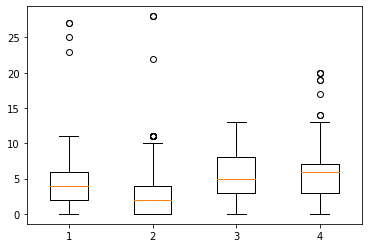

In [15]:
fig, ax = plt.subplots()
ax.boxplot([df.NumWebPurchases, df.NumCatalogPurchases, 
            df.NumStorePurchases, df.NumWebVisitsMonth])
plt.show()

In [16]:
print(outliers(df.NumWebPurchases),
     outliers(df.NumCatalogPurchases),
     outliers(df.NumStorePurchases),
     outliers(df.NumWebVisitsMonth))

(array([  27, 1806, 1898, 1975], dtype=int64),) (array([  21,  104,  164,  288,  586,  591,  627,  636,  687,  764,  777,
        934,  984, 1212, 1452, 1465, 1492, 1653, 1745, 1828, 1906, 1940,
       1958], dtype=int64),) (array([], dtype=int64),) (array([   9,  774,  981, 1042, 1245, 1328, 1524, 1846], dtype=int64),)


※ 일단 출생년도와 수입에 대한 이상치만 제거

In [17]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")

In [18]:
df = df.drop([192, 239, 339])
df = df[df.Income < 140000]

#### 결측치 확인

In [19]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Income에 대한 이상치를 제거하면 결측치 역시 제거된다.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2205 non-null   int64  
 1   Year_Birth           2205 non-null   int64  
 2   Education            2205 non-null   object 
 3   Marital_Status       2205 non-null   object 
 4   Income               2205 non-null   float64
 5   Kidhome              2205 non-null   int64  
 6   Teenhome             2205 non-null   int64  
 7   Dt_Customer          2205 non-null   object 
 8   Recency              2205 non-null   int64  
 9   MntWines             2205 non-null   int64  
 10  MntFruits            2205 non-null   int64  
 11  MntMeatProducts      2205 non-null   int64  
 12  MntFishProducts      2205 non-null   int64  
 13  MntSweetProducts     2205 non-null   int64  
 14  MntGoldProds         2205 non-null   int64  
 15  NumDealsPurchases    2205 non-null   i

#### 추가변수, 파생변수 만들기

1. Dt_Customer(고객 등록 날짜)
<br> 날짜 형식으로 변경

In [21]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format = '%d-%m-%Y')

2. Education, Marital_Status 더미변수 변환

In [22]:
df = pd.get_dummies(df, columns = ['Education', 'Marital_Status'])

3. 총 자녀 수 생성

In [23]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

4. MntWines & MntFruits & MntMeatProducts & MntFishProducts & MntSweetProducts & MntGoldProds
<br>전체 상품에 대한 지불 총 금액 컬럼 생성

In [24]:
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#### 불필요 컬럼 제거

In [25]:
df.drop(['ID','Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [26]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Children,TotalMntSpent
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,1,0,0,0,0,1617
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,1,0,0,0,2,27
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,1,0,0,0,776
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,1,0,0,1,53
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,0,0,1,0,0,0,0,1,422


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year_Birth               2205 non-null   int64         
 1   Income                   2205 non-null   float64       
 2   Kidhome                  2205 non-null   int64         
 3   Teenhome                 2205 non-null   int64         
 4   Dt_Customer              2205 non-null   datetime64[ns]
 5   Recency                  2205 non-null   int64         
 6   MntWines                 2205 non-null   int64         
 7   MntFruits                2205 non-null   int64         
 8   MntMeatProducts          2205 non-null   int64         
 9   MntFishProducts          2205 non-null   int64         
 10  MntSweetProducts         2205 non-null   int64         
 11  MntGoldProds             2205 non-null   int64         
 12  NumDealsPurchases        2205 non-